In [1]:
print("Hello, World")

Hello, World


In [2]:
!pip install matplotlib

In [3]:
!pip install torch torchvision torchaudio

In [4]:
# Package 준비

import torch
from torch import nn
from torch import optim

In [5]:
# 데이터 준비
a = 0.1
b = 0.3

x = torch.normal(0.0, 0.55, (1000, 1)) # 10000개의 데이터 추출
y = a * x + b + torch.normal(0.0, 0.05, (1000, 1)) # 노이즈 추가(torch.normal(0.0, 0.05, (1000, 1)))

In [6]:
from matplotlib import pyplot as plt

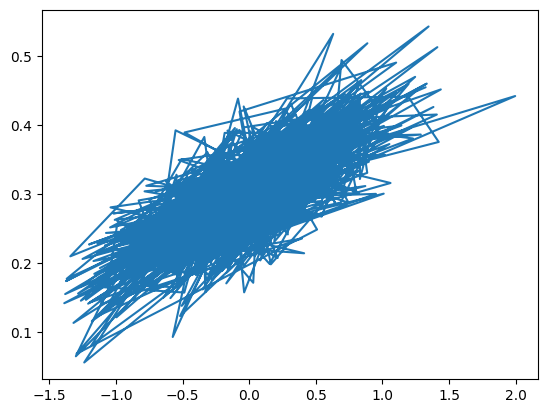

In [7]:
plt.plot(x,y) # x,y 2차원 좌표계를 띄움(Plot은 점을 모두 연결짓게 되어있음)

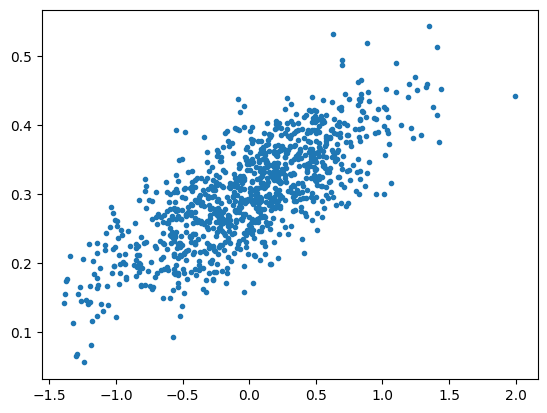

In [8]:
plt.plot(x,y, ".") # 좌표를 .으로 나타내도록 변경

In [9]:
# 딥러닝 모델 생성
param = torch.randn(2, requires_grad=True) #gradient 계산 넣어줘

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, X):
        X = self.linear(X)
        return X

model = nn.Linear(1, 1)
model = Model()

# param = list(model.parameters())
print(f"Initial parameters")
print(f"a: {param[0].item():.3f}, b: {param[1].item():.3f}\n")


Initial parameters
a: 0.615, b: -0.620



In [ ]:
# 학습 방법 준비
## 오차함수
## Greaidnet descent 알고리즘

LEARNING_RATE = 0.05

criterion  = nn.MSELoss() # MSELoss 로 오차 계산
optimizer = optim.SGD([param], lr=LEARNING_RATE) # 최적화 방법으로 SGD를 사용할건데, 어떤 값을 사용할거야.
# optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [ ]:
# Training loop
print("Start training")

EPOCHS = 200    # 몇 번 학습할 것인가
for epoch in range(EPOCHS):
    y_pred = param[0]*x + param[1]
    # y_pred = model.forward(x)

    loss = criterion(y_pred, y) # 순서 중요 : 앞에는 예측, 실제는 정답값

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()     # 각각의 매개변수 편미분
    optimizer.step()    # loss 값을 기준으로 학습이 진행됨

    # 첫 번째 에폭, 10번째 에폭마다 -> y_pred가 어떻게 되고 있는지 출력해달라
    if (epoch == 0) or ((epoch+1) % 10 == 0):
        # param = list(model.parameters())
        y_pred = param[0].detach() * x + param[1].detach()
        print(f"Epoch: {epoch+1}, Loss: {loss.data.numpy():.4f}, a: {param[0].item():.3f}, b: {param[1].item():.3f}")

In [ ]:
# Training loop
print("Start training")

EPOCHS = 200    # 몇 번 학습할 것인가
for epoch in range(EPOCHS):
    y_pred = param[0]*x + param[1]
    # y_pred = model.forward(x)

    loss = criterion(y_pred, y) # 순서 중요 : 앞에는 예측, 실제는 정답값

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()     # 각각의 매개변수 편미분
    optimizer.step()    # loss 값을 기준으로 학습이 진행됨

    # 첫 번째 에폭, 10번째 에폭마다 -> y_pred가 어떻게 되고 있는지 출력해달라
    if (epoch == 0) or ((epoch+1) % 10 == 0):
        # param = list(model.parameters())
        y_pred = param[0].detach() * x + param[1].detach()

        plt.plot(x, y, ".")     # 생성된 데이터 plot
        plt.plot(x, y_pred, "-")     # 선을 그려보자
        plt.show()